In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
City_Data_DF = pd.read_csv(city_data_to_load)
Ride_Data_DF = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
CombinedPyberData_DF = pd.merge(City_Data_DF, Ride_Data_DF,
                                 how='left', on='city')
# Display the data table for preview
CombinedPyberData_DF.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
CombinedPyberData_DF.columns
OrganizedPyber_DF = CombinedPyberData_DF[["city","date","fare","ride_id","driver_count","type"]]
OrganizedPyber_DF.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [3]:
CityCount1 = OrganizedPyber_DF.groupby(['city']).driver_count.count()
CityCount1.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: driver_count, dtype: int64

## Bubble Plot of Ride Sharing Data

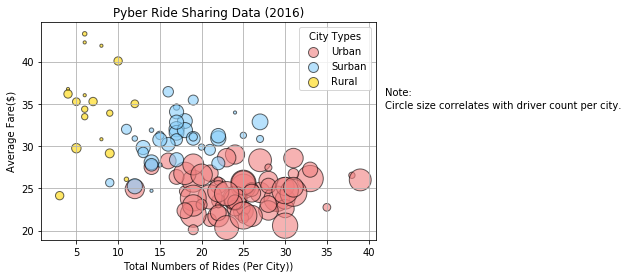

In [4]:
# Obtain the x and y coordinates for each of the three city types
Urban = OrganizedPyber_DF.loc[(OrganizedPyber_DF["type"] == "Urban")]
Suburban = OrganizedPyber_DF.loc[(OrganizedPyber_DF["type"] == "Suburban")]
Rural = OrganizedPyber_DF.loc[(OrganizedPyber_DF["type"] == "Rural")]

UrbanRides = Urban.groupby(['city']).ride_id.count()
SuburbanRides = Suburban.groupby(['city']).ride_id.count()
RuralRides = Rural.groupby(['city']).ride_id.count()

UrbanFare = Urban.groupby(['city']).fare.mean()
SuburbanFare = Suburban.groupby(['city']).fare.mean()
RuralFare = Rural.groupby(['city']).fare.mean()

UrbanDrivers = Urban.groupby(['city']).driver_count.mean()
SuburbanDrivers = Suburban.groupby(['city']).driver_count.mean()
RuralDrivers = Rural.groupby(['city']).driver_count.mean()

# Build the scatter plots for each city types
plt.scatter(UrbanRides, UrbanFare, s=UrbanDrivers*10, marker="o", facecolors="lightcoral", edgecolors="black", alpha=.6, label="Urban")
plt.scatter(SuburbanRides, SuburbanFare, s=SuburbanDrivers*10, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=.6, label="Surban")
plt.scatter(RuralRides, RuralFare, s=RuralDrivers*10, marker="o", facecolors="Gold", edgecolors="black", alpha=.6, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
plt.grid(True)

# Create a legend
UrbanLegend = plt.legend(title="City Types", loc="best")
UrbanLegend.legendHandles[0]._sizes = [100]
UrbanLegend.legendHandles[1]._sizes = [100]
UrbanLegend.legendHandles[2]._sizes = [100]

# Incorporate a text label regarding circle size
plt.text(42, 36,"Note:")
plt.text(42, 34.5,"Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("PyberScatter.png")

## Total Fares by City Type

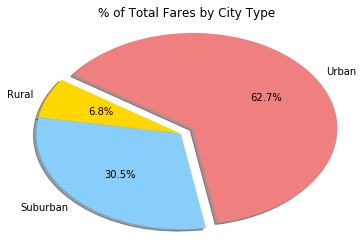

In [53]:
# Calculate Type Percents
UrbanTotFarePerc = round((sum(Urban.groupby(['city']).fare.sum()))/((sum(Urban.groupby(['city']).fare.sum()))+(sum(Suburban.groupby(['city']).fare.sum()))+(sum(Rural.groupby(['city']).fare.sum())))*100,1)
SuburbanTotFarePerc = round((sum(Suburban.groupby(['city']).fare.sum()))/((sum(Urban.groupby(['city']).fare.sum()))+(sum(Suburban.groupby(['city']).fare.sum()))+(sum(Rural.groupby(['city']).fare.sum())))*100,1)
RuralTotFarePerc = round((sum(Rural.groupby(['city']).fare.sum()))/((sum(Urban.groupby(['city']).fare.sum()))+(sum(Suburban.groupby(['city']).fare.sum()))+(sum(Rural.groupby(['city']).fare.sum())))*100,1)


# Build Pie Chart
PieLabels = ['Urban','Rural','Suburban']
TFBCTWedges = [UrbanTotFarePerc,
               RuralTotFarePerc,
               SuburbanTotFarePerc]
LabelColors = ['lightcoral','gold', 'lightskyblue']
TFBCTexplode = (.1, 0, 0)

# create and display pie chart
plt.pie(UrbanWedges, labels=PieLabels, autopct='%1.1f%%', startangle=280,\
        colors=LabelColors, explode=TFBCTexplode, shadow=True)
plt.axis("tight")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("PyberTFBCT.png")
plt.show()

## Total Rides by City Type

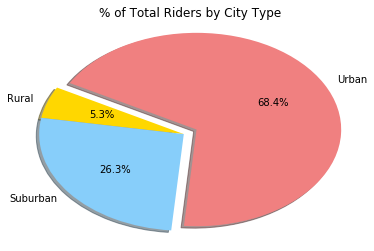

In [54]:
# Calculate Ride Percents
UrbanTotFares = round(((UrbanRides).sum() / (((UrbanRides).sum())+((SuburbanRides).sum())+((RuralRides).sum())))*100,1)
SuburbanTotFares = round(((SuburbanRides).sum() / (((UrbanRides).sum())+((SuburbanRides).sum())+((RuralRides).sum())))*100,1)
RuralTotFares = round(((RuralRides).sum() / (((UrbanRides).sum())+((SuburbanRides).sum())+((RuralRides).sum())))*100,1)
# Build Pie Chart
TRBCTWedges = [UrbanTotFares,
               RuralTotFares,
               SuburbanTotFares]
TRBCTexplode = (.1, 0, 0)
plt.pie(TRBCTWedges, labels=PieLabels, autopct='%1.1f%%', startangle=265,\
        colors=LabelColors, explode=TRBCTexplode, shadow=True)
plt.axis("tight")
plt.title("% of Total Riders by City Type")

# Save Figure
plt.savefig("PyberTRBCT.png")

## Total Drivers by City Type

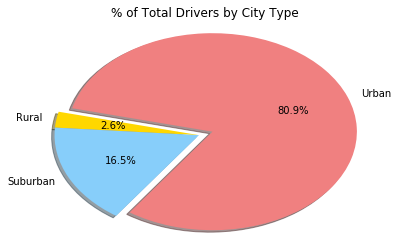

In [59]:
# Calculate Driver Percents
TotUrbanDriverPerc = round(UrbanDrivers.sum()/(UrbanDrivers.sum()+SuburbanDrivers.sum()+RuralDrivers.sum())*100,1)
TotSuburbanDriverPerc = round(SuburbanDrivers.sum()/(UrbanDrivers.sum()+SuburbanDrivers.sum()+RuralDrivers.sum())*100,1)
TotRuralDriverPerc = round(RuralDrivers.sum()/(UrbanDrivers.sum()+SuburbanDrivers.sum()+RuralDrivers.sum())*100,1)


# Build Pie Charts
TDBCTWedges = [TotUrbanDriverPerc,
               TotRuralDriverPerc,
               TotSuburbanDriverPerc]
TDBCTexplode = (.1, 0, 0)
plt.pie(TDBCTWedges, labels=PieLabels, autopct='%1.1f%%', startangle=235,\
        colors=LabelColors, explode=TRBCTexplode, shadow=True)
plt.axis("tight")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("PyberTDBCT.png")

In [61]:
# 1) Urban cities make the most money but significantly more drivers
# 2) Suburban cities seem to make the most money for the number of drivers required
# 3) Rural cities command the highest fares per city in general but do not account for very high volumn 